<a href="https://colab.research.google.com/github/pmantramurti/CMPE257-Fall23-Pranay-Mantramurti/blob/main/ClassActivity1_PLA%26Pocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import random

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/synthetic_dataset.csv')

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

#PLA ALgorithm

In [55]:
w = [1,0,0]

def getSign(x):
  if x < 0:
    return -1
  if x >= 0:
    return 1

def getDot(w, i):
  ans = w[0] + w[1]*df.x1[i] + w[2]*df.x2[i]
  return ans

def adjustWeights(w, i):
  w2 = [w[0] + df.y[i], w[1] + df.x1[i]*df.y[i], w[2] + df.x2[i]*df.y[i]]
  return w2

accurate = False
i = 0
while not accurate:
  accurate = True
  i = random.randrange(0, df.shape[0])
  if getSign(getDot(w, i)) != df.y[i]:
    w = adjustWeights(w, i)
  for i in range(0, df.shape[0]):
    if getSign(getDot(w, i)) != df.y[i]:
      accurate = False
      break

len = df.shape[0]
corr = 0
for i in range(0, df.shape[0]):
  if getSign(getDot(w, i)) == df.y[i]:
    corr+= 1

Accuracy :  1.0


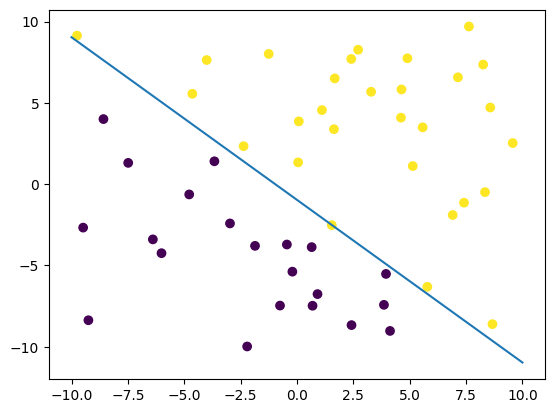

In [56]:
print('Accuracy : ', corr/len)
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
x=np.linspace(start=-10, stop=10)
ax.plot(x, -(w[1]*x+w[0])/w[1])

#Pocket Algorithm

In [57]:
w = [1,0,0]
wFin = [1,0,0]

accurate = False

iterations = 0
mistakes = 0
minMistakes = df.shape[0]

while not accurate and iterations < 100:
  iterations += 1
  accurate = True
  i = random.randrange(0, df.shape[0])
  if getSign(getDot(w, i)) != df.y[i]:
    w = adjustWeights(w, i)
  for i in range(0, df.shape[0]):
    if getSign(getDot(w, i)) != df.y[i]:
      accurate = False
      mistakes+=1
  if mistakes < minMistakes:
    minMistakes = mistakes
    wFin = w.copy()
  mistakes = 0

len = df.shape[0]
corr = 0
for i in range(0, df.shape[0]):
  if getSign(getDot(wFin, i)) == df.y[i]:
    corr+= 1

Accuracy :  0.94


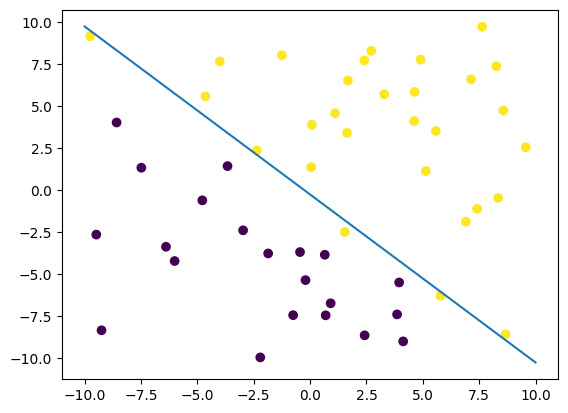

In [58]:
print('Accuracy : ', corr/len)
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y)
x=np.linspace(start=-10, stop=10)
ax.plot(x, -(w[1]*x+w[0])/w[1])